# Tangent fermions: Majorana metal

In this notebook we show how to use the code in tangent_fermions.py produce the phase diagram of figure 11 of arXiv:2302.12793

In [1]:
import tangent_fermions as tf
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla

from scipy.linalg import eigh
from scipy.stats.mstats import gmean

First, let us do a coarser sampling with less realisations for time's sake

In [2]:
finesse = 31
means = np.linspace(-2,2,finesse)
variances = np.linspace(0,6,finesse)
deltaE = 0.23
number_of_eigenvalues = 60
number_of_realisations = 20

def mass(mean, var, Ny, Nx):
    mass_array = 2*var*np.random.rand(Ny,Nx)
    mass_array = mass_array - np.average(mass_array) + mean*np.ones((Ny,Nx))
    return mass_array

Nx = 20
Ny = 20

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0*x,
    kx = pi/Nx,
    ky = pi/Ny,#Antiperiodic boundary conditions
    disorder = 0
)


LDOS = np.zeros((len(means),len(variances),Ny,Nx))
geometric_average_DOS = np.zeros((len(means),len(variances)))

for i,mean in enumerate(means):
    print('Column ', i+1, ' out of ', finesse)
    for j,var in enumerate(variances):
        fermi_states = []
        for dummy in range(number_of_realisations):
            
            parameters['mass'] = lambda x,y: mass(mean, var, Ny, Nx)
            Phi, H, P = tf.operators_real(parameters)
            
            #For this system size it is worth it to do the full diagonalisation
            #eigenvalues, eigenstates = sla.eigsh(H, M=P, k = number_of_eigenvalues, tol = 0, sigma = 0, which = 'LM',return_eigenvectors = True)
            eigenvalues, eigenstates = eigh(H.A,b=P.A)
            
            for state in range(len(eigenvalues)):
                if np.abs(eigenvalues[state]) < deltaE:
                    normalised_state = (Phi@eigenstates[:,state]).reshape(2,Ny,Nx)
                    fermi_states.append(normalised_state)
                    
        fermi_states = np.array(fermi_states)
        if fermi_states.shape[0] != 0:
            LDOS[i,j] = np.sum(np.abs(fermi_states)**2,axis = (0,1))
            geometric_average_DOS[i,j] = gmean(LDOS[i,j], axis = None)*Nx*Ny/number_of_realisations/deltaE

Column  1  out of  31
Column  2  out of  31
Column  3  out of  31
Column  4  out of  31
Column  5  out of  31
Column  6  out of  31
Column  7  out of  31
Column  8  out of  31
Column  9  out of  31
Column  10  out of  31
Column  11  out of  31
Column  12  out of  31
Column  13  out of  31
Column  14  out of  31
Column  15  out of  31
Column  16  out of  31
Column  17  out of  31
Column  18  out of  31
Column  19  out of  31
Column  20  out of  31
Column  21  out of  31
Column  22  out of  31
Column  23  out of  31
Column  24  out of  31
Column  25  out of  31
Column  26  out of  31
Column  27  out of  31
Column  28  out of  31
Column  29  out of  31
Column  30  out of  31
Column  31  out of  31


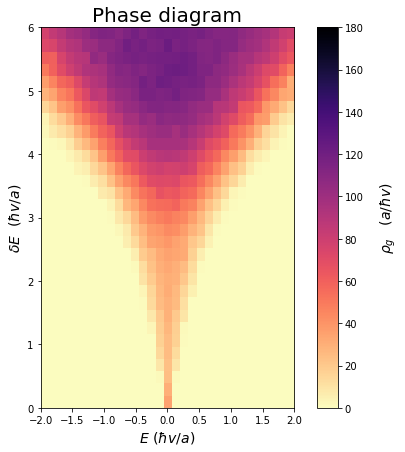

In [3]:
fig = plt.figure(figsize = (7,7))
orig_map=plt.cm.get_cmap('magma')
reversed_map = orig_map.reversed()

ax = fig.add_subplot(111)
pos = ax.imshow(geometric_average_DOS.T,cmap=reversed_map, extent=[-2,2,0,6], origin = 'lower', vmax = 180)
ax.set_title(r'Phase diagram', fontsize = 20)
ax.set_xlabel(r'$E$ ($\hbar v/a$)', fontsize = 14)
ax.set_ylabel(r'$\delta E$  ($\hbar v/a$)', fontsize = 14)

fig.subplots_adjust(right=0.88)
c_loc = fig.add_axes([0.8, 0.125, 0.04, 0.755])
cbar = fig.colorbar(pos, cax=c_loc)
cbar.set_label(r'$\rho_g$   ($a/\hbar v$)',fontsize = 14,labelpad = 15 )

The following cell contains the parameters to reproduce figure 11 of arXiv:2302.12793

In [ ]:
finesse = 201
means = np.linspace(-2,2,finesse)
variances = np.linspace(0,6,finesse)
deltaE = 0.23
number_of_eigenvalues = 60
number_of_realisations = 50

def mass(mean, var, Ny, Nx):
    mass_array = 2*var*np.random.rand(Ny,Nx)
    mass_array = mass_array - np.average(mass_array) + mean*np.ones((Ny,Nx))
    return mass_array

Nx = 20
Ny = 20

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0*x,
    kx = pi/Nx,
    ky = pi/Ny,#Antiperiodic boundary conditions
    disorder = 0
)


LDOS = np.zeros((len(means),len(variances),Ny,Nx))
geometric_average_DOS = np.zeros((len(means),len(variances)))

for i,mean in enumerate(means):
    print('Column ', i+1, ' out of ', finesse)
    for j,var in enumerate(variances):
        fermi_states = []
        for dummy in range(number_of_realisations):
            
            parameters['mass'] = lambda x,y: mass(mean, var, Ny, Nx)
            Phi, H, P = tf.operators_real(parameters)
            
            #For this system size it is worth it to do the full diagonalisation
            #eigenvalues, eigenstates = sla.eigsh(H, M=P, k = number_of_eigenvalues, tol = 0, sigma = 0, which = 'LM',return_eigenvectors = True)
            eigenvalues, eigenstates = eigh(H.A,b=P.A)
            
            for state in range(len(eigenvalues)):
                if np.abs(eigenvalues[state]) < deltaE:
                    normalised_state = (Phi@eigenstates[:,state]).reshape(2,Ny,Nx)
                    fermi_states.append(normalised_state)
                    
        fermi_states = np.array(fermi_states)
        if fermi_states.shape[0] != 0:
            LDOS[i,j] = np.sum(np.abs(fermi_states)**2,axis = (0,1))
            geometric_average_DOS[i,j] = gmean(LDOS[i,j], axis = None)*Nx*Ny/number_of_realisations/deltaE